Find the markdown blocks that say interaction required! The notebook should take care of the rest!

# Import libs

In [1]:
import sys
import os
sys.path.append('..')
from eflow.foundation import DataPipeline,DataFrameTypes
from eflow.model_analysis import ClassificationAnalysis
from eflow.utils.modeling_utils import optimize_model_grid
from eflow.utils.eflow_utils import get_type_holder_from_pipeline, remove_unconnected_pipeline_segments
from eflow.utils.pandas_utils import data_types_table
from eflow.utils.sys_utils import get_all_directories_from_path
from eflow.utils.sys_utils import load_pickle_object

import pandas as pd
import numpy as np
import scikitplot as skplt
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import SCORERS
import copy
import pickle
from IPython.display import clear_output

In [2]:
# # Additional add ons
# !pip install pandasgui
# !pip install pivottablejs
# clear_output()

In [3]:
%matplotlib notebook
%matplotlib inline

## Declare Project Variables

### Interaction required

In [4]:
dataset_path = "Datasets/titanic_train.csv"

# -----
dataset_name = "Titanic Data"
pipeline_name = "Titanic Pipeline"

# -----


# -----
notebook_mode = True

## Clean out segment space

In [5]:
remove_unconnected_pipeline_segments()

# Import dataset

In [6]:
df = pd.read_csv(dataset_path)
shape_df = pd.DataFrame.from_dict({'Rows': [df.shape[0]],
                                   'Columns': [df.shape[1]]})
display(shape_df)
display(df.head(30))

,Rows,Columns
0,891,12


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [7]:
data_types_table(df)

,Data Types
Features,
Age,float64
Fare,float64
PassengerId,int64
Survived,int64
Pclass,int64
SibSp,int64
Parch,int64
Name,object
Sex,object


# Loading and init df_features

In [8]:
# Option: 1
# df_features = get_type_holder_from_pipeline(pipeline_name)

In [9]:
# Option: 2
df_features = DataFrameTypes()
df_features.init_on_json_file(os.getcwd() + f"/eflow Data/{dataset_name}/df_features.json")

In [10]:
df_features.display_features(display_dataframes=True,
                             notebook_mode=notebook_mode)

,Data Types
Features,
Cabin,string
Embarked,string
Pclass,string
Sex,string
Survived,bool
Parch,integer
SibSp,integer
Age,float
Fare,float


# Any extra processing before eflow DataPipeline

# Setup pipeline structure

### Interaction Required

In [11]:
main_pipe = DataPipeline(pipeline_name,
                         df,
                         df_features)

The file 'root_pipeline.json' exist!
Now configuring object with proper pipeline segments...
Removing the feature: "PassengerId"
Removing the feature: "Ticket"
Removing the feature: "Name"


In [12]:
main_pipe.perform_pipeline(df,
                           df_features)

In [13]:
df

,Survived,Age,SibSp,Parch,Fare,Pclass_1,Pclass_2,Pclass_3,Embarked_Cherbourg,Embarked_Queenstown,Embarked_Southampton,Sex_female,Sex_male
0,0,22.000000,1,0,7.2500,False,False,True,False,False,True,False,True
1,1,38.000000,1,0,71.2833,True,False,False,True,False,False,True,False
2,1,26.000000,0,0,7.9250,False,False,True,False,False,True,True,False
3,1,35.000000,1,0,53.1000,True,False,False,False,False,True,True,False
4,0,35.000000,0,0,8.0500,False,False,True,False,False,True,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,27.000000,0,0,13.0000,False,True,False,False,False,True,False,True
887,1,19.000000,0,0,30.0000,True,False,False,False,False,True,True,False
888,0,28.312774,1,2,23.4500,False,False,True,False,False,True,True,False
889,1,26.000000,0,0,30.0000,True,False,False,True,False,False,False,True


# Seperate out data into train and test sets

In [14]:
X = df.drop(columns=df_features.target_feature()).values
y = df[df_features.target_feature()].values

In [15]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=517, stratify=y,
)
del X
del y

In [16]:
feature_order = list(df.columns)

In [17]:
del df

In [18]:
# n_estimators=100, criterion='gini', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features='auto', max_leaf_nodes=None, min_impurity_decrease=0.0, min_impurity_split=None, bootstrap=True, oob_score=False, n_jobs=None, random_state=None, verbose=0, warm_start=False, class_weight=None, ccp_alpha=0.0, max_samples=None

# Fit Models and view results

In [19]:
sorted(SCORERS.keys())

['accuracy',
 'adjusted_mutual_info_score',
 'adjusted_rand_score',
 'average_precision',
 'balanced_accuracy',
 'completeness_score',
 'explained_variance',
 'f1',
 'f1_macro',
 'f1_micro',
 'f1_samples',
 'f1_weighted',
 'fowlkes_mallows_score',
 'homogeneity_score',
 'jaccard',
 'jaccard_macro',
 'jaccard_micro',
 'jaccard_samples',
 'jaccard_weighted',
 'max_error',
 'mutual_info_score',
 'neg_brier_score',
 'neg_log_loss',
 'neg_mean_absolute_error',
 'neg_mean_gamma_deviance',
 'neg_mean_poisson_deviance',
 'neg_mean_squared_error',
 'neg_mean_squared_log_error',
 'neg_median_absolute_error',
 'neg_root_mean_squared_error',
 'normalized_mutual_info_score',
 'precision',
 'precision_macro',
 'precision_micro',
 'precision_samples',
 'precision_weighted',
 'r2',
 'recall',
 'recall_macro',
 'recall_micro',
 'recall_samples',
 'recall_weighted',
 'roc_auc',
 'roc_auc_ovo',
 'roc_auc_ovo_weighted',
 'roc_auc_ovr',
 'roc_auc_ovr_weighted',
 'v_measure_score']

In [20]:
# # Find best parameters for model
# param_grid = {
#     "n_estimators": np.arange(100, 500, 50),
#     "criterion": ["entropy", "gini"],
#     "max_depth": [4,5,6,7,]
# }

# model, best_params = optimize_model_grid(
#     model=RandomForestClassifier(),
#     X_train=X_train,
#     y_train=y_train,
#     param_grid=param_grid,
#     scoring="f1_micro"
# )

In [21]:
model = load_pickle_object("/Users/ericcacciavillani/Desktop/Coding/Python_Files/Artificial_Intelligence/Data Mining/eFlow/testing/eflow Data/Titanic Data/Classification Analysis/Target Feature: Survived/RandomForestClassifier/RandomForestClassifier.pkl")

In [22]:
model_name = repr(model).split("(")[0]
model_name

'RandomForestClassifier'

In [23]:
model_analysis = ClassificationAnalysis(dataset_name=dataset_name,
                                        model=model,
                                        model_name=model_name,
                                        feature_order=feature_order,
                                        target_feature=df_features.target_feature(),
                                        pred_funcs_dict={"Probabilities function":model.predict_proba,
                                                         "Predict function":model.predict},
                                        sample_data=X_train[0],
                                        notebook_mode=notebook_mode,
                                        df_features=df_features)



------------------------------Train Data------------------------------
Now running classification on Probabilities function on thresholds:
	Target Value:0: Prediction weight: 0.12
	Target Value:1: Prediction weight: 0.04

Shape of the data is (623, 12)


,Metric Scores
Precision(micro),0.8523
Precision(macro),0.8579
Precision(weighted),0.8544
MCC,0.6845
Recall(micro),0.8523
Recall(macro),0.8273
Recall(weighted),0.8523
F1-Score(micro),0.8523
F1-Score(macro),0.8377
F1-Score(weighted),0.8490


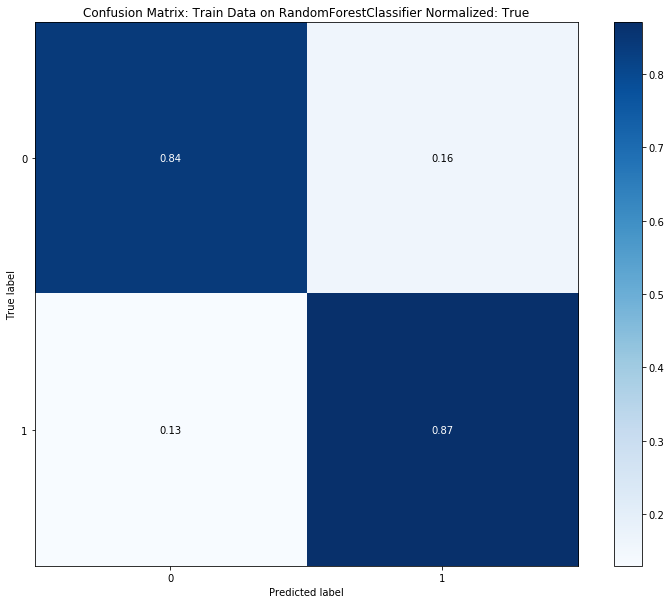

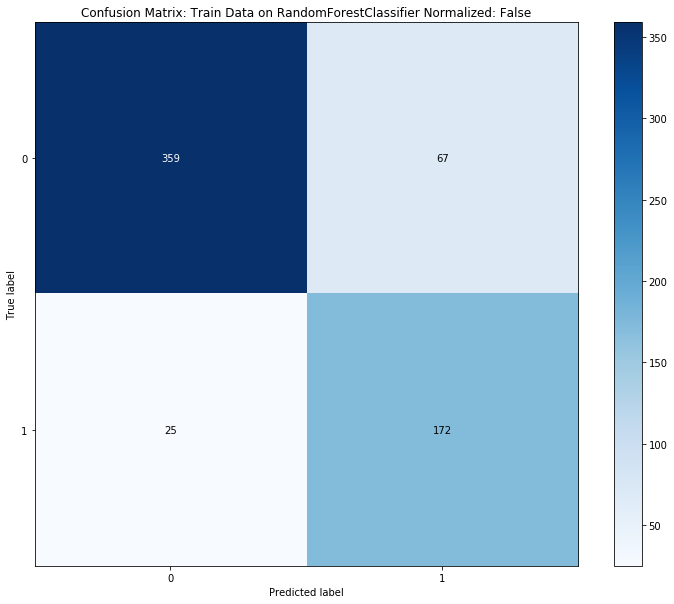

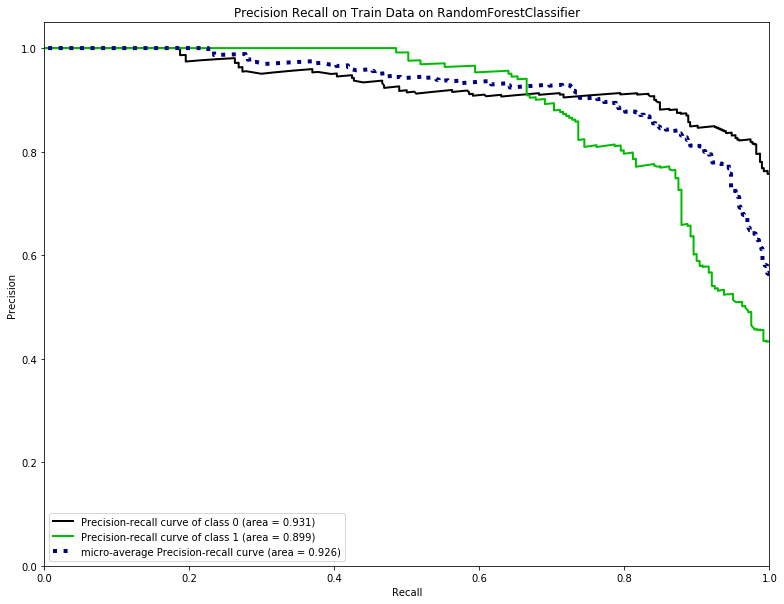

/Users/ericcacciavillani/anaconda3/envs/eflow/lib/python3.7/site-packages/scikitplot/metrics.py:443: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  mean_tpr += interp(all_fpr, fpr_dict[i], tpr_dict[i])


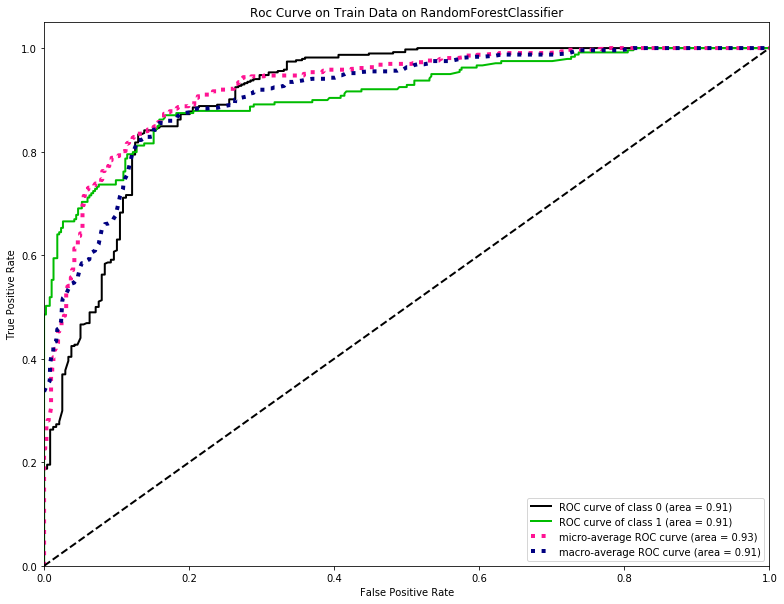

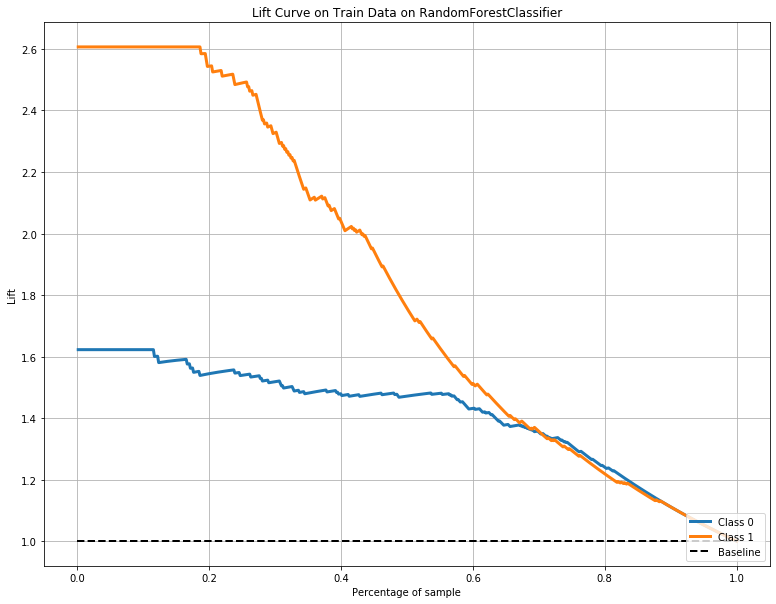

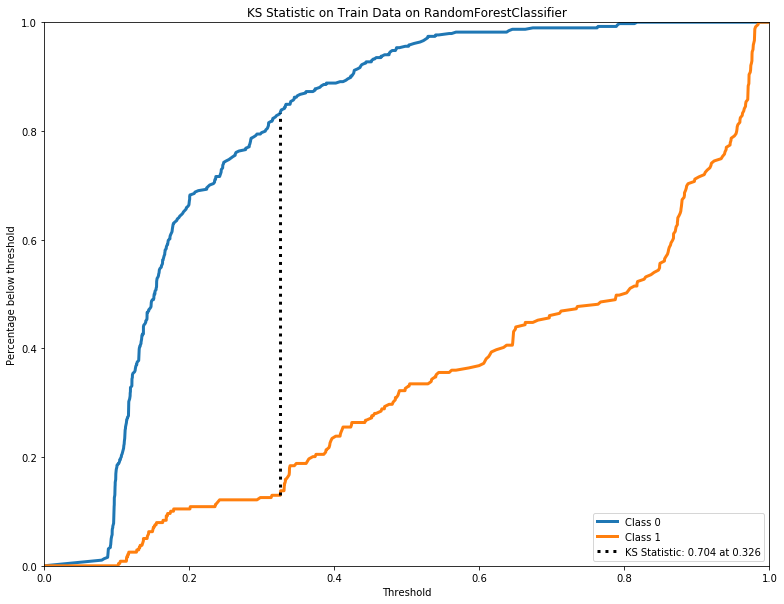

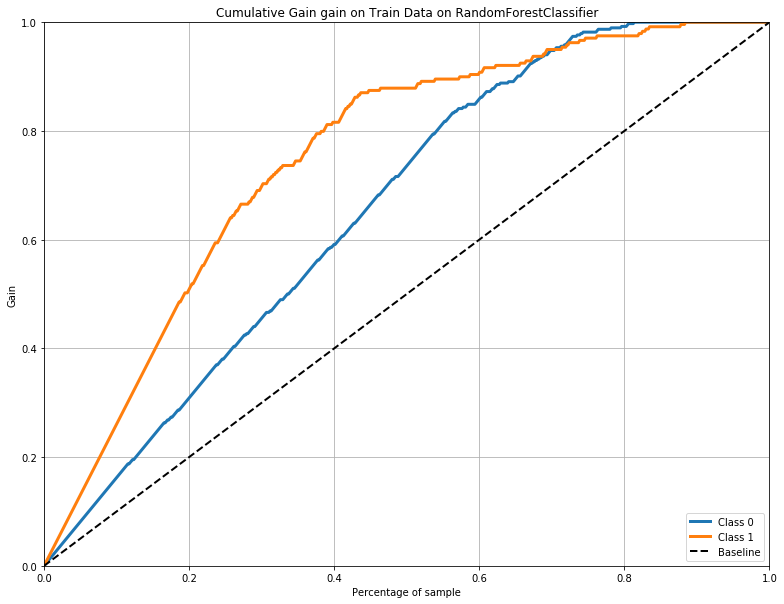



**********Generating graphs for when the model predicted incorrectly**********



../eflow/model_analysis/classification_analysis.py:1359: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  prediction_feature] == pred_target])
../eflow/model_analysis/classification_analysis.py:1359: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  prediction_feature] == pred_target])




**********Generating graphs for when the model predicted correctly**********

----------------------------------------------------------------------

Now running classification on Probabilities function on no thresholds.

Shape of the data is (623, 12)


,Metric Scores
Precision(micro),0.8475
Precision(macro),0.8646
Precision(weighted),0.8553
MCC,0.6775
Recall(micro),0.8475
Recall(macro),0.8147
Recall(weighted),0.8475
F1-Score(micro),0.8475
F1-Score(macro),0.8288
F1-Score(weighted),0.8420


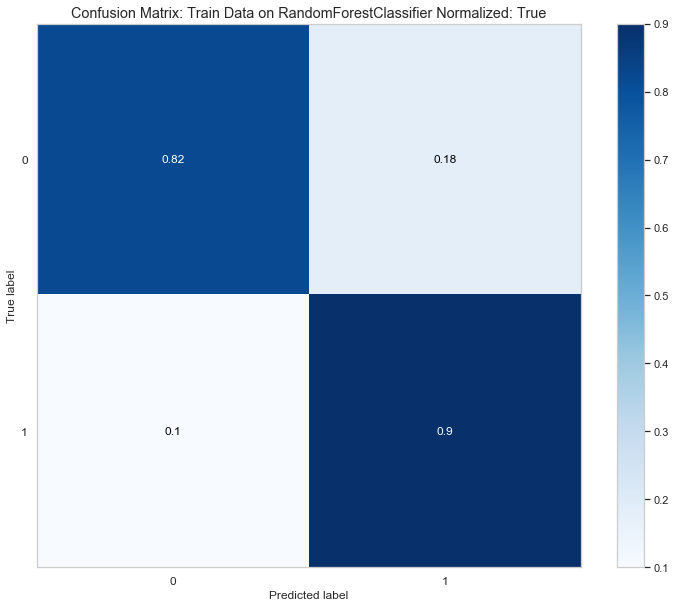

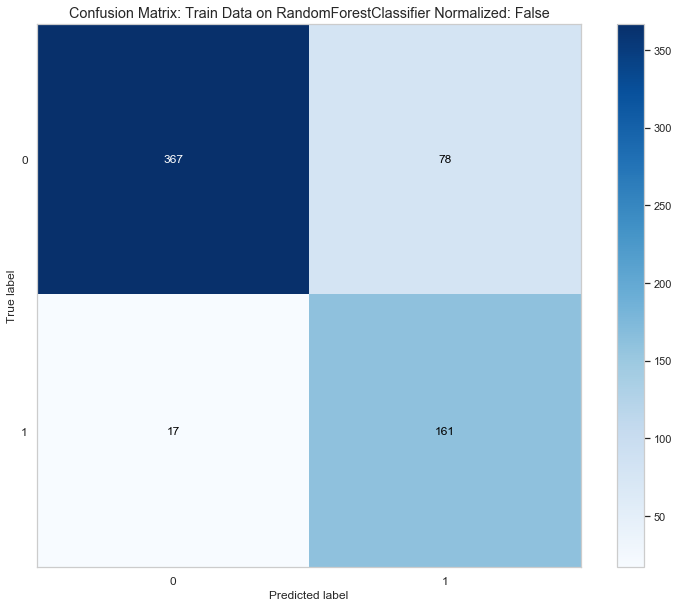

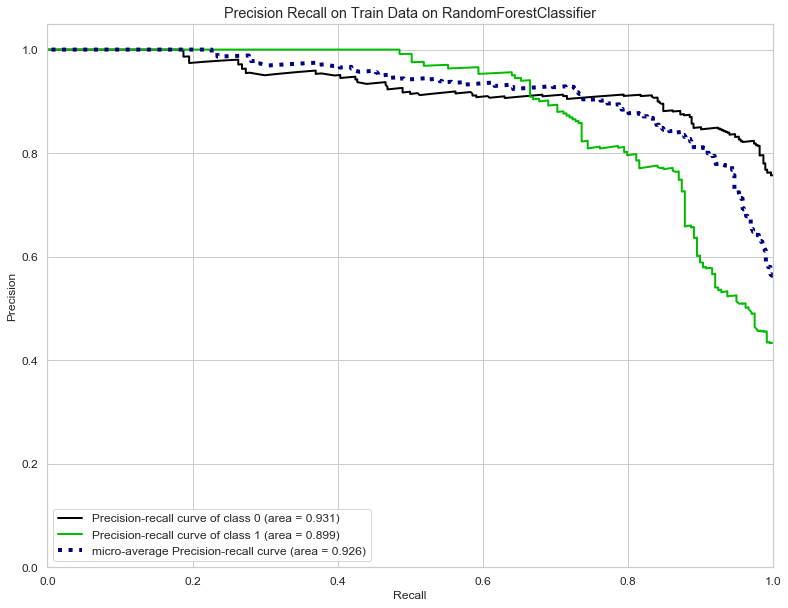

/Users/ericcacciavillani/anaconda3/envs/eflow/lib/python3.7/site-packages/scikitplot/metrics.py:443: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  mean_tpr += interp(all_fpr, fpr_dict[i], tpr_dict[i])


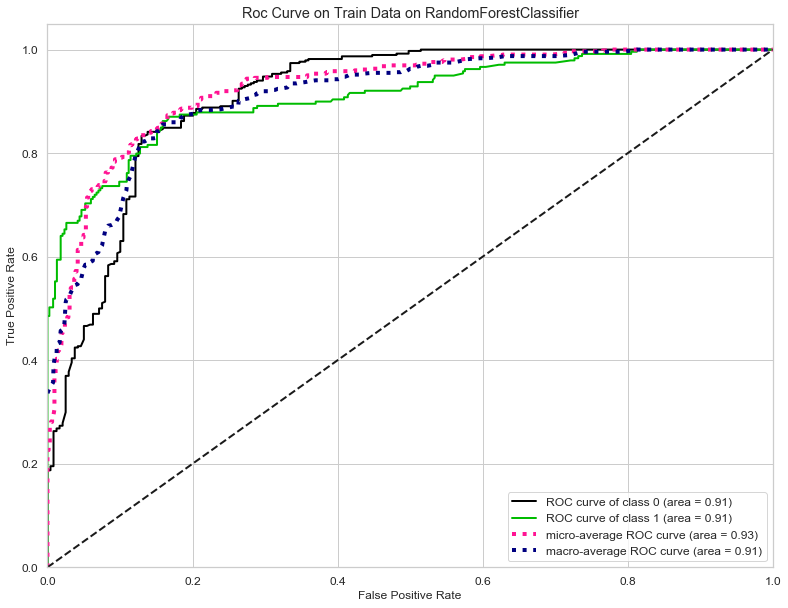

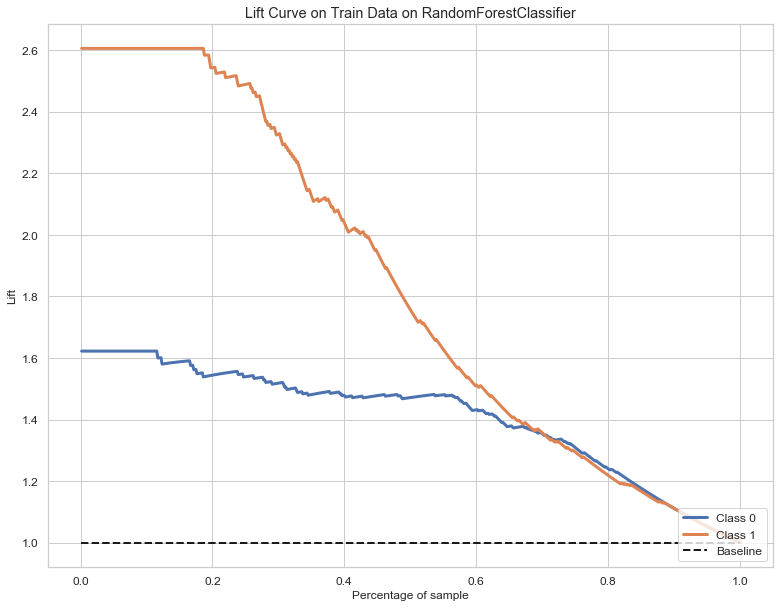

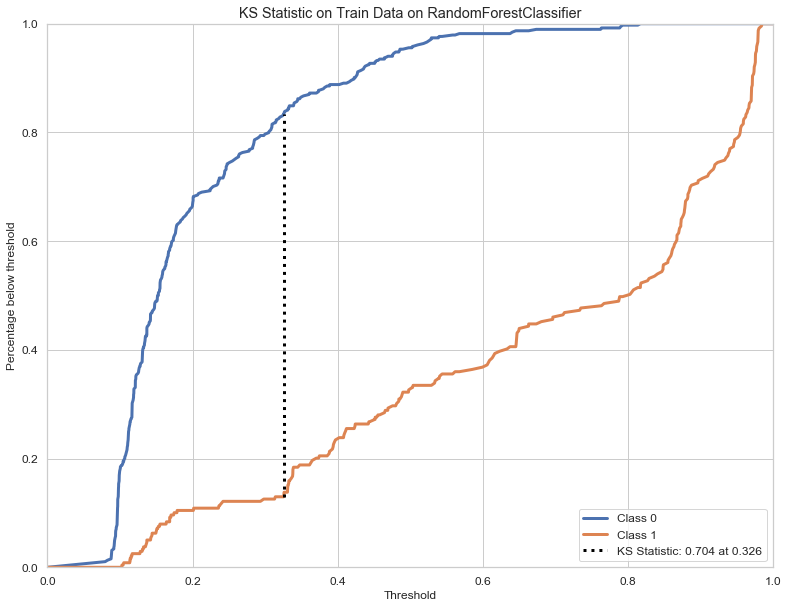

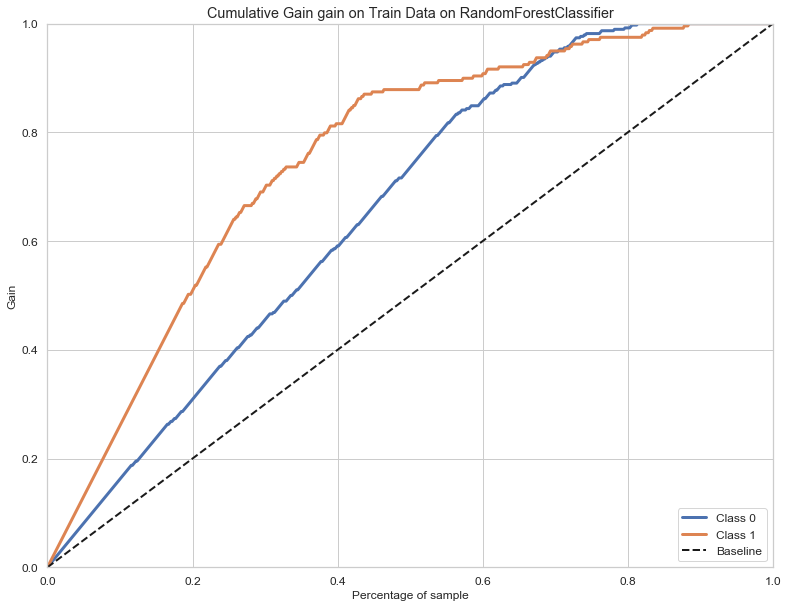



**********Generating graphs for when the model predicted incorrectly**********



../eflow/model_analysis/classification_analysis.py:1359: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  prediction_feature] == pred_target])
../eflow/model_analysis/classification_analysis.py:1359: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  prediction_feature] == pred_target])




**********Generating graphs for when the model predicted correctly**********

----------------------------------------------------------------------





Now running classification on Predict function

Shape of the data is (623, 12)


,Metric Scores
Precision(micro),0.8475
Precision(macro),0.8646
Precision(weighted),0.8553
MCC,0.6775
Recall(micro),0.8475
Recall(macro),0.8147
Recall(weighted),0.8475
F1-Score(micro),0.8475
F1-Score(macro),0.8288
F1-Score(weighted),0.8420


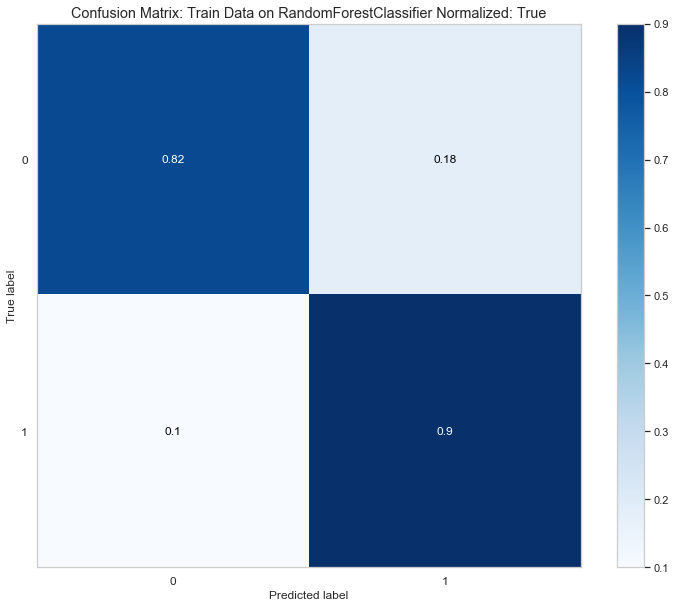

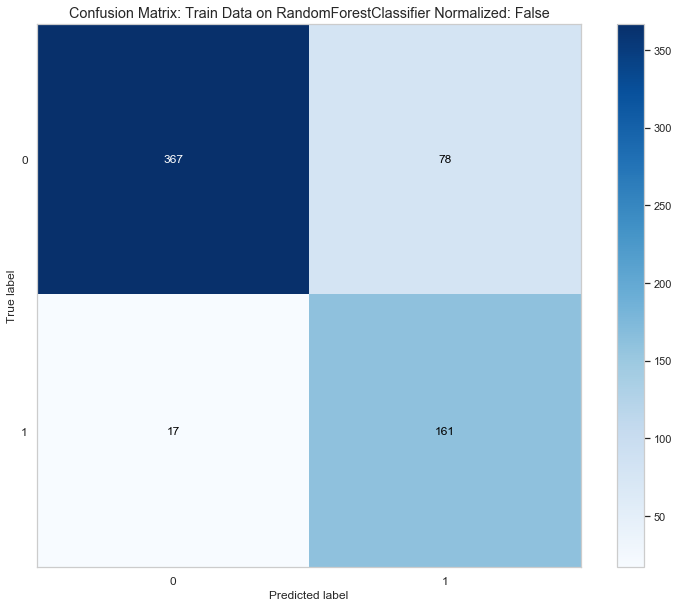



**********Generating graphs for when the model predicted incorrectly**********



../eflow/model_analysis/classification_analysis.py:1359: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  prediction_feature] == pred_target])
../eflow/model_analysis/classification_analysis.py:1359: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  prediction_feature] == pred_target])




**********Generating graphs for when the model predicted correctly**********



In [ ]:
model_analysis.perform_analysis(X=X_train,
                                y=y_train,
                                dataset_name="Train Data",
                                thresholds_matrix=[[.12,.04,]],
                                classification_error_analysis=True,
                                classification_correct_analysis=True)

In [ ]:
for pred_name in model_analysis.get_predictions_names():
    print(f"Prediction name: {pred_name}")

    for threshold_dir in get_all_directories_from_path(model_analysis.folder_path + f"Train Data/{pred_name}/"):
        prediction_path = model_analysis.folder_path + f"Train Data/{pred_name}/"
        if "Thresholds" in threshold_dir:
            prediction_path += f"{threshold_dir}/"
            
        for answered_dir in get_all_directories_from_path(prediction_path):
            for sub_dir in get_all_directories_from_path(prediction_path + f"{answered_dir}/"):
                print(prediction_path + f"{answered_dir}/{sub_dir}/")
                infile = open(prediction_path + f"{answered_dir}/{sub_dir}/Train Data/_Extras/Statistics/Stat methods of features dataframes.pkl",'rb')
                stat_methods_dict = pickle.load(infile)
                infile.close()

                for stats_method in stat_methods_dict.keys():
                    print(stats_method)
                    display(stat_methods_dict[stats_method].round(6))
                    all_feature_relationship = set()
                    for feature_relationship in stat_methods_dict[stats_method][:10].index.to_list():
                        for feature in feature_relationship.split(" compared to "):
                            all_feature_relationship.add(feature)
                    print(all_feature_relationship)
                    print("-----" * 12 + "\n\n")

                del stat_methods_dict

In [ ]:
model_analysis.perform_analysis(X=X_test,
                                y=y_test,
                                dataset_name="Test Data",
                                thresholds_matrix=[[.0,.0],
                                                   [.12,.04]],
                                classification_error_analysis=True,
                                classification_correct_analysis=True)

In [ ]:
for pred_name in model_analysis.get_predictions_names():
    print(f"Prediction name: {pred_name}")

    for threshold_dir in get_all_directories_from_path(model_analysis.folder_path + f"Test Data/{pred_name}/"):
        prediction_path = model_analysis.folder_path + f"Test Data/{pred_name}/"
        if "Thresholds" in threshold_dir:
            prediction_path += f"{threshold_dir}/"
            
        for answered_dir in get_all_directories_from_path(prediction_path):
            for sub_dir in get_all_directories_from_path(prediction_path + f"{answered_dir}/"):
                infile = open(prediction_path + f"{answered_dir}/{sub_dir}/Test Data/_Extras/Statistics/Stat methods of features dataframes.pkl",'rb')
                stat_methods_dict = pickle.load(infile)
                infile.close()

                for stats_method in stat_methods_dict.keys():
                    print(stats_method)
                    display(stat_methods_dict[stats_method].round(6))
                    all_feature_relationship = set()
                    for feature_relationship in stat_methods_dict[stats_method][:10].index.to_list():
                        for feature in feature_relationship.split(" compared to "):
                            all_feature_relationship.add(feature)
                    print("-----" * 12 + "\n\n")

                del stat_methods_dict